<a href="https://colab.research.google.com/github/enjimohamed/CODSOFT/blob/main/IMDB_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Read File

In [319]:
fl=pd.read_csv('/content/IMDb Movies India.csv',encoding='latin-1')

In [320]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [321]:
fl.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


# Preprocessing

In [322]:
fl.duplicated().sum()

6

In [323]:
fl = fl.drop_duplicates()

In [324]:
fl.duplicated().sum()

0

In [325]:
fl.isna().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

In [326]:
fl.dropna(subset=["Rating","Director","Actor 1","Actor 2","Actor 3","Genre"], inplace=True)

In [327]:
mo=fl['Duration'].mode()[0]
fl["Duration"]=fl["Duration"].fillna(mo)

In [328]:
fl.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [329]:
fl['Votes'] = fl['Votes'].str.replace(',','').astype(int)

In [330]:
fl['Year'] = fl['Year'].str.replace('[()]','', regex=True).astype(int)

In [331]:
fl['Duration']=fl['Duration'].str.replace('min','').astype(int)

In [332]:
fl.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


# Data Visualization

Text(0.5, 0, 'Number of Votes')

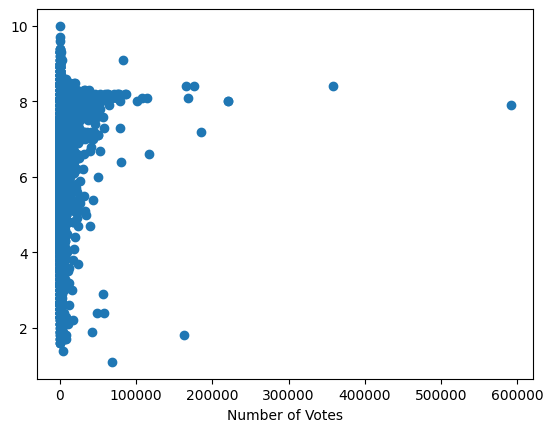

In [333]:
plt.scatter(fl['Votes'],fl['Rating'])
plt.xlabel("Number of Votes")

<BarContainer object of 7558 artists>

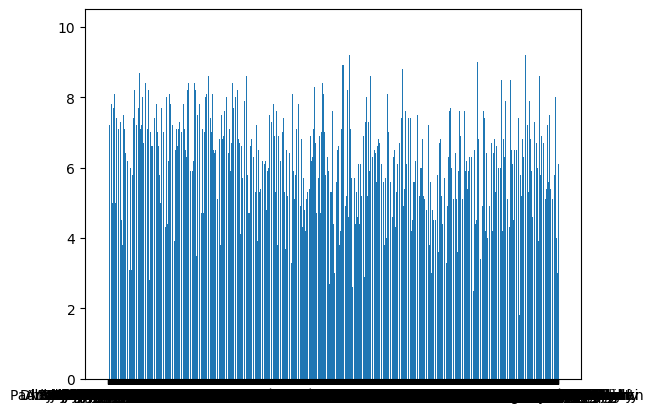

In [334]:
plt.bar(fl['Director'], fl['Rating'])


# Outliers

<Axes: ylabel='Votes'>

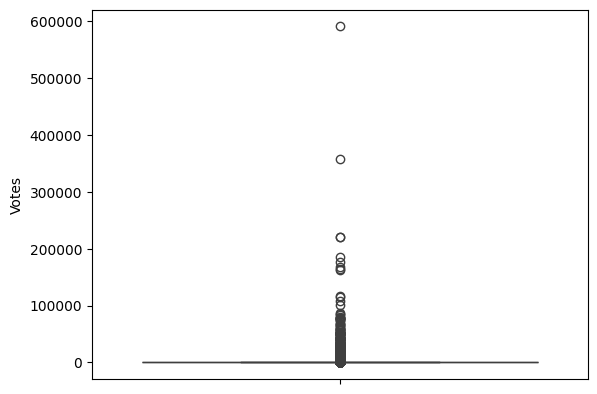

In [335]:
sns.boxplot(fl['Votes'])

In [336]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int64  
 2   Duration  7558 non-null   int64  
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int64  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 649.5+ KB


In [350]:
Q1 = fl["Votes"].quantile(0.25)
Q3 = fl["Votes"].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
fl = fl[(fl["Votes"] >= lower_bound) & (fl["Votes"] <= upper_bound)]

<Axes: ylabel='Votes'>

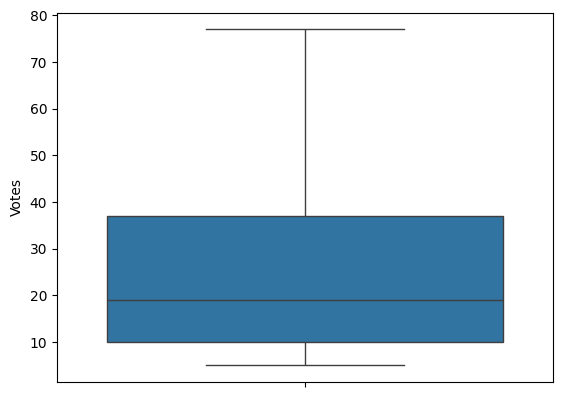

In [351]:
sns.boxplot(fl['Votes'])

In [352]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4076 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      4076 non-null   object 
 1   Year      4076 non-null   int64  
 2   Duration  4076 non-null   int64  
 3   Genre     4076 non-null   object 
 4   Rating    4076 non-null   float64
 5   Votes     4076 non-null   int64  
 6   Director  4076 non-null   object 
 7   Actor 1   4076 non-null   object 
 8   Actor 2   4076 non-null   object 
 9   Actor 3   4076 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 350.3+ KB


# Data Encoding

In [353]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4076 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      4076 non-null   object 
 1   Year      4076 non-null   int64  
 2   Duration  4076 non-null   int64  
 3   Genre     4076 non-null   object 
 4   Rating    4076 non-null   float64
 5   Votes     4076 non-null   int64  
 6   Director  4076 non-null   object 
 7   Actor 1   4076 non-null   object 
 8   Actor 2   4076 non-null   object 
 9   Actor 3   4076 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 350.3+ KB


In [354]:
label_encoder=LabelEncoder()

fl['Genre']=label_encoder.fit_transform(fl['Genre'])
fl['Director']=label_encoder.fit_transform(fl['Director'])
fl['Actor 1']=label_encoder.fit_transform(fl['Actor 1'])
fl['Actor 2']=label_encoder.fit_transform(fl['Actor 2'])
fl['Actor 3']=label_encoder.fit_transform(fl['Actor 3'])

# Correlation

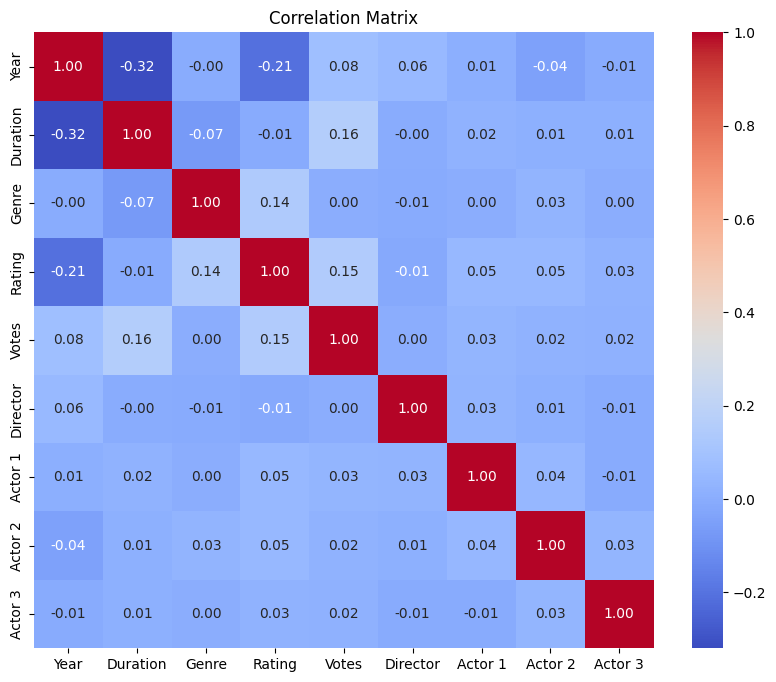

In [355]:
numeric = fl.select_dtypes(include=[np.number])

correlation_matrix = numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Models

In [356]:
x=fl.drop(['Rating','Name'],axis=1)
y=fl['Rating']

In [357]:
scaler=MinMaxScaler()
normx=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(normx,y,test_size=0.2,random_state=42)

In [358]:
model=LinearRegression()
model.fit(x_train,y_train)
ypre=model.predict(x_test)
r2 =r2_score(y_test,ypre)
mse=mean_squared_error(y_test,ypre)
print("R Squared:",r2)
print("Mean Squared Error:",mse)

R Squared: 0.10925890212979084
Mean Squared Error: 1.4604631873804936


In [359]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R squared:", r2)

Mean Squared Error: 1.2226510588235298
R squared: 0.25430126835171585
